In [2]:
import numpy as np
import json

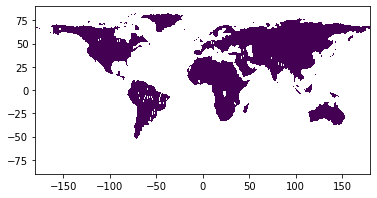

<AxesSubplot:>

In [3]:
import rasterio
from rasterio.plot import show
fp = 'gpw_v4_population_density_adjusted_to_2015_unwpp_country_totals_rev11_2020_30_sec.tif'
img = rasterio.open(fp)
show(img)

In [5]:
print(img.crs)

EPSG:4326


In [6]:
affine = img.transform
affine

Affine(0.00833333333333387, 0.0, -180.0,
       0.0, -0.00833333333333387, 90.00000000001157)

In [7]:
imarray = img.read(1)
imarray.size

933120000

In [ ]:
#-124.409591	32.534156	-114.131211	42.009518

In [54]:
affine * (6671, 5759)

(-124.40833333332975, 42.00833333334182)

In [71]:
affine * (7904, 6896)

(-114.13333333332909, 32.533333333341204)

In [79]:
portion[0][6671:7904].shape

(1233,)

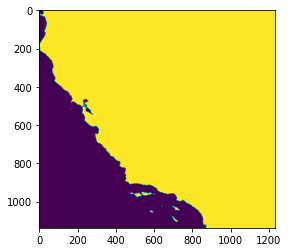

<AxesSubplot:>

In [80]:
portion = imarray[5759:6896]
new_arr = []
for i in range(len(portion)):
    new_arr.append(portion[i][6671:7904])
show(new_arr)

In [8]:
# from pyproj import Transformer
# transformer = Transformer.from_crs("epsg:32610", "epsg:4326")#Change to 32610 which is the salo epsg
# transformer.transform(648490.0, 4377880.0)

(39.53775311661699, -121.27206566921241)

In [82]:
len(new_arr), len(new_arr[0])

(1137, 1233)

In [7]:
origin = affine * (0, 0)
end = affine * (len(imarray[0]), len(imarray))
origin, end

((-180.0, 90.00000000001157), (180.00000000002314, -90.0))

In [8]:
img.bounds

BoundingBox(left=-180.0, bottom=-90.0, right=180.00000000002314, top=90.00000000001157)

In [86]:
d = {}
i = 5759
while i < len(new_arr) + 5759:
    j = 6671
    epsg_coords = affine * (j, i)
    latitude = epsg_coords[1]
    while j < len(new_arr[0]) + 6671:
        epsg_coords = affine * (j, i)
        longitude = epsg_coords[0]
        d[str(latitude) + ", " + str(longitude)] = imarray[i][j]
        j += 1
    i += 1
    if i % (len(imarray) // 100) == 0:
        print(str(int((i+1) / len(imarray) * 100)) + "%")

27%
28%
29%
30%
31%


In [87]:
len(d)

1401921

In [ ]:
# d = {}
# i = 0
# while i < int(len(imarray) / 2):
#     j = 0
#     epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#     lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#     latitude = lat_long_coordas[0]
# #     latitude = topmost - i * 2 * delta_lat - 0.5 * delta_lat
#     row1 = imarray[2 * i]
#     row2 = imarray[2 * i + 1]
    
#     while j < int(len(imarray[0]) / 2):
#         epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#         lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#         longitude = lat_long_coords[1]
# #         longitude = leftmost + j * 2 * delta_long + 0.5 * delta_long
#         d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row1[2 * j + 1] + row2[2 * j] + row2[2 * j + 1]) / 4
#         j += 1
#     if j < len(imarray[0]) / 2:
#         epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#         lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#         longitude = lat_long_coords[1]
#         d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row2[2 * j]) / 2
#     i += 1
#     if i % (len(imarray) // 100) == 0:
#         print(str(int(i / len(imarray) * 200)) + "%")
# if i < len(imarray) / 2:
#     j = 0
#     epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#     lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#     latitude = lat_long_coords[0]
#     while j < int(len(imarray[0]) / 2):
#         epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#         lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#         longitude = lat_long_coords[1]
#         d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row1[2 * j + 1] + row2[2 * j] + row2[2 * j + 1]) / 4
#         j += 1
#     if j < len(imarray[0]) / 2:
#         epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#         lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#         longitude = lat_long_coords[1]
#         d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row2[2 * j]) / 2

In [88]:
len(d.keys())

1401921

In [89]:
d_key_list = list(d.keys())

In [91]:
d_key_list[860000]

'36.20000000000811, -119.41666666666276'

In [92]:
rightmost = -150
leftmost = 0
topmost = 20
bottommost = 80

In [93]:
for coord in d_key_list:
    lat = float(coord.split(", ")[0])
    long = float(coord.split(", ")[1])
    if long < leftmost:
        leftmost = long
    if long > rightmost:
        rightmost = long
    if lat > topmost:
        topmost = lat
    if lat < bottommost:
        bottommost = lat

In [94]:
rightmost, leftmost, topmost, bottommost

(-114.14166666666243,
 -124.40833333332975,
 42.00833333334182,
 32.54166666667454)

In [96]:
d[d_key_list[860000]]

9.98922

In [97]:
import pickle
pickle_out = open("CaliforniaPopulationLongLat.pickle", "wb")
pickle.dump(d, pickle_out)
pickle_out.close()

In [ ]:
d_key_list[0]

In [ ]:
d[d_key_list[0]]